In [1]:
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.
W0919 16:52:31.502038  9500 deprecation_wrapper.py:119] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 16:52:31.514119  9500 deprecation_wrapper.py:119] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 16:52:31.517063  9500 deprecation_wrapper.py:119] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 16:52:31.533073  9500 deprecation_wrapper.py:119] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 16:52:31.774375  9500 deprecation_wrapper.p

In [2]:
base_dir = 'F:\\datasets'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 500)
test_features, test_labels = extract_features(test_dir, 88)

Found 500 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [3]:
train_features = np.reshape(train_features, (500, 4 * 4 * 512))
test_features = np.reshape(test_features, (88, 4 * 4 * 512))

In [4]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20)



W0919 16:53:46.918633  9500 deprecation.py:506] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0919 16:53:46.941631  9500 deprecation_wrapper.py:119] From C:\Users\Gachon\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 16:53:46.946622  9500 deprecation.py:323] From C:\Users\Gachon\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 0.7307 - acc: 0.5260
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6734 - acc: 0.5940
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6485 - acc: 0.6220
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5919 - acc: 0.6840
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5837 - acc: 0.6680
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5473 - acc: 0.7080
Epoch 7/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5394 - acc: 0.7200
Epoch 8/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5121 - acc: 0.7400
Epoch 9/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4948 - acc: 0.7560
Epoch 10/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4943 - acc: 0.7380
Epoch 11/50
500/500 [============================

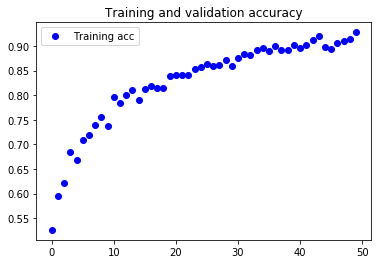

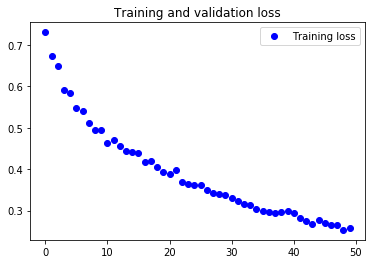

In [6]:

import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [10]:
conv_base.trainable = False

In [11]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      verbose=2)

Found 500 images belonging to 2 classes.
Epoch 1/10
 - 224s - loss: 0.6222 - acc: 0.6635
Epoch 2/10
 - 224s - loss: 0.5400 - acc: 0.7300
Epoch 3/10
 - 224s - loss: 0.5041 - acc: 0.7555
Epoch 4/10
 - 226s - loss: 0.4812 - acc: 0.7740
Epoch 5/10
 - 225s - loss: 0.4562 - acc: 0.7850
Epoch 6/10
 - 225s - loss: 0.4361 - acc: 0.7990
Epoch 7/10
 - 223s - loss: 0.4170 - acc: 0.8170
Epoch 8/10
 - 222s - loss: 0.4075 - acc: 0.8175
Epoch 9/10
 - 222s - loss: 0.3942 - acc: 0.8240
Epoch 10/10
 - 221s - loss: 0.3912 - acc: 0.8350


In [13]:
model.save('heartsound.h5')

In [14]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100)

Epoch 1/100
100/100 [==============================] - 269s 3s/step - loss: 0.3473 - acc: 0.8470
Epoch 2/100
100/100 [==============================] - 267s 3s/step - loss: 0.2705 - acc: 0.8845
Epoch 3/100
100/100 [==============================] - 266s 3s/step - loss: 0.2369 - acc: 0.8995
Epoch 4/100
100/100 [==============================] - 265s 3s/step - loss: 0.2099 - acc: 0.9125
Epoch 5/100
100/100 [==============================] - 265s 3s/step - loss: 0.1763 - acc: 0.9240
Epoch 6/100
100/100 [==============================] - 265s 3s/step - loss: 0.1530 - acc: 0.9355
Epoch 7/100
100/100 [==============================] - 265s 3s/step - loss: 0.1360 - acc: 0.9450
Epoch 8/100
100/100 [==============================] - 265s 3s/step - loss: 0.1189 - acc: 0.9540
Epoch 9/100
100/100 [==============================] - 265s 3s/step - loss: 0.1106 - acc: 0.9525
Epoch 10/100
100/100 [==============================] - 265s 3s/step - loss: 0.1029 - acc: 0.9590
Epoch 11/100
100/100 [=======

100/100 [==============================] - 263s 3s/step - loss: 0.0040 - acc: 0.9990
Epoch 85/100
100/100 [==============================] - 263s 3s/step - loss: 0.0037 - acc: 0.9990
Epoch 86/100
100/100 [==============================] - 263s 3s/step - loss: 0.0051 - acc: 0.9980
Epoch 87/100
100/100 [==============================] - 263s 3s/step - loss: 0.0020 - acc: 0.9990
Epoch 88/100
100/100 [==============================] - 263s 3s/step - loss: 0.0066 - acc: 0.9980
Epoch 89/100
100/100 [==============================] - 263s 3s/step - loss: 0.0015 - acc: 0.9995
Epoch 90/100
100/100 [==============================] - 263s 3s/step - loss: 0.0050 - acc: 0.9980
Epoch 91/100
100/100 [==============================] - 263s 3s/step - loss: 0.0045 - acc: 0.9980
Epoch 92/100
100/100 [==============================] - 263s 3s/step - loss: 0.0045 - acc: 0.9980
Epoch 93/100
100/100 [==============================] - 263s 3s/step - loss: 7.9464e-04 - acc: 0.9995
Epoch 94/100
100/100 [=======

In [19]:
model.save('heartsound2.h5')

In [20]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 88 images belonging to 2 classes.
test acc: 0.7954545446417548
